# $\chi^2$ Investigations

In this notebook we first investigate how the `absolute_simga` parameter of `curve_fit` can affect the inferred uncertainty on the model parameters. We then compare confidence intervals with the results of bootrapping. Next, we look at information criterion for adding more parameters to the model.  

To this end, we simulate many dataset using a normal distribution:

$$ y\sim \mathcal{N}(\mu, \sigma_y)$$

With $\mu$ the true position as given by our model and $\sigma_y$ the uncertainty (standard error) of the data $y$.

First we define our model:

In [ ]:
# basic imports
import scipy.stats
from scipy.optimize import curve_fit
from pylab import * #lazy

# let's define our model
np.random.seed(10) # fix seed to compare results

# we fix the true values of the parameters
a_true = 2
b_true = 3

# we fix the range of of the independent variable (say, time)
xmin = 0.1
xmax = 10

def linear_model(x, a=a_true, b=b_true):
	'''
	a line
	'''
	return a + x*b

This function simulates data. We may assume that the uncertainty on $y$ is a fixed fraction of the true value.

In [ ]:
def sim_data(x, fractional_uncertainty=0.2):

	# find the model prediction
	y_true = model(x)

	# find the true uncertainty on the observations
	y_unc_true = np.abs(y_true)*fractional_uncertainty

	# generate data for a normal distribution
	y_sample = np.random.normal(y_true, y_unc_true, size=len(x))

	return y_sample, y_unc_true


_the cell below allows you to toggle between models (these will be added later)_

In [ ]:
# lets pick one model
model = linear_model
#model = non_linear_model # you might add this later



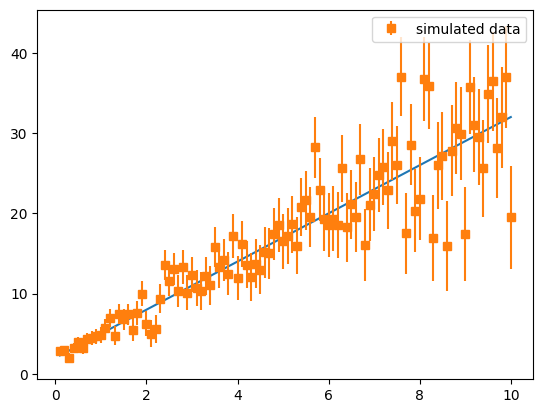

if you think this looks weird, it helps to look in log-space


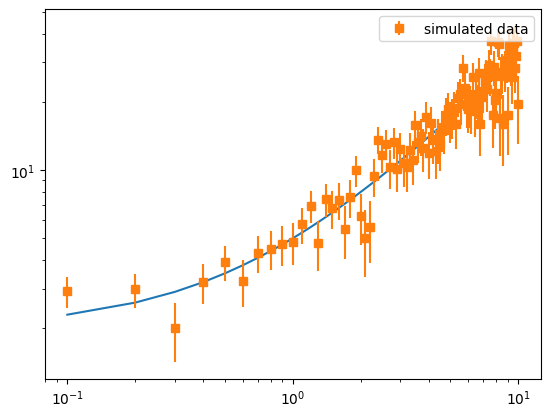

In [ ]:
# plot the simulation results
xx = np.linspace(xmin, xmax, 100)
data_example = sim_data(xx)

plt.clf()
plt.plot(xx, model(xx, a_true, b_true))
plt.errorbar(xx, data_example[0],data_example[1], fmt='s', label='simulated data')
plt.legend()
plt.pause(0.1)
print('if you think this looks weird, it helps to look in log-space')

plt.clf()
plt.plot(xx, model(xx, a_true, b_true))
plt.errorbar(xx, data_example[0],data_example[1], fmt='s', label='simulated data')
plt.legend()
plt.yscale('log')
plt.xscale('log')

## Part 1: $\chi^2$ rescaling of `curve_fit`

Make 5000 simulation of a dataset with N=3 points. Note, the location of the datapoint on the x-axis is kept fixed in each simulation (ie, `x_data = np.linspace(xmin, xmax, N)`)

Of each simulation, find the standard error on the slope ($\sigma_{b}$) of the best-fit line using `curve_fit` with `absolute_sigma=False` (the default). In this setting the uncertainties are rescaled using the $\chi^2$ of the best-fit parameters.

- Plot a distribution of the 5000 $\chi^2$ and compare to the theoretical value (see `scipy.stats.chi2`).

- Compare the distribution of $\sigma_{b}$ with the "correct" value. How often is confidence interval with $\chi^2$-rescaling a factor 2 larger/smaller compared to the correct value?

- Repeat the last step with $N=10$ datapoints.

## Part 2: Bootstrap

### Bootstrap with linear model

First let's check that bootstrap works for our linear model. Let's do a non-parametric bootstap:

-  simulate _a single_ dataset with $N=400$ points
- Draw $B=20000$ bootstrap samples.
- Compare the bootstrapped distribution of the parameter $b$ with the normal distribution, $\mathcal{N}(0,\sigma_b)$, predicted by the least-squares fit.

You should find good agreement.

### Bootstrap with non-linear model
The documentation of `curve_fit` says:  
>Note that the relationship between cov and parameter error estimates is derived based on a linear approximation to the model function around the optimum [1]. When this approximation becomes inaccurate, cov may not provide an accurate measure of uncertainty.

But how bad can it be? Let's check. Again we use only two parameters $a$ and $b$.  



We know that the bootstrap will give a more correct answer than least-squares, so we can use this to check the preformance of `curve_fit` confidence intervals.

- dream-up a non-linear model that combines $a$ and $b$, add this above and set `model = non_linear_model`
- Redo the comparison of the bootstrap confidence interval with least-squares normal distribution.
 - do you see any difference?
 - Does least-squares aways under/over predict the uncertainty?

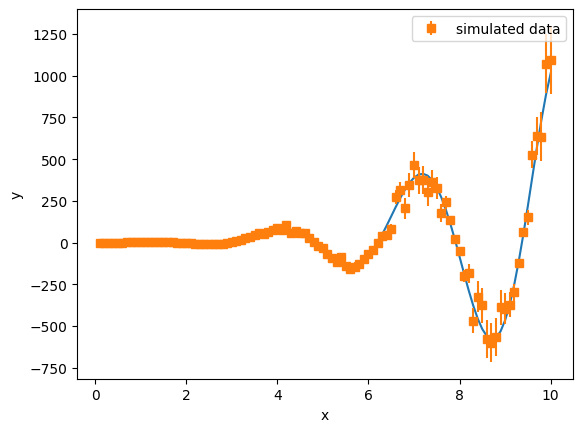

In [ ]:
# dream up non-linear model

def non_linear_model(x, a=a_true, b=b_true):
	'''
	some function that look funky over xmin/xmax
	'''
	return x**a + x**b * np.sin(x*a)

# toggle to use the cells below for the non-linear model
model = non_linear_model


# test
xx = np.linspace(xmin, xmax, 100)
data_example = sim_data(xx)

plt.clf()
plt.plot(xx, model(xx, a_true, b_true))
plt.errorbar(xx, data_example[0],data_example[1], fmt='s', label='simulated data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.pause(0.1)


# left 20000
# left 19000
# left 18000
# left 17000
# left 16000
# left 15000
# left 14000
# left 13000
# left 12000
# left 11000
# left 10000
# left 9000
# left 8000
# left 7000
# left 6000
# left 5000
# left 4000
# left 3000
# left 2000
# left 1000
least-squares result: 3.001 -0.0013 +0.0013
bootstrap result    : 3.001 -0.0013 +0.0024


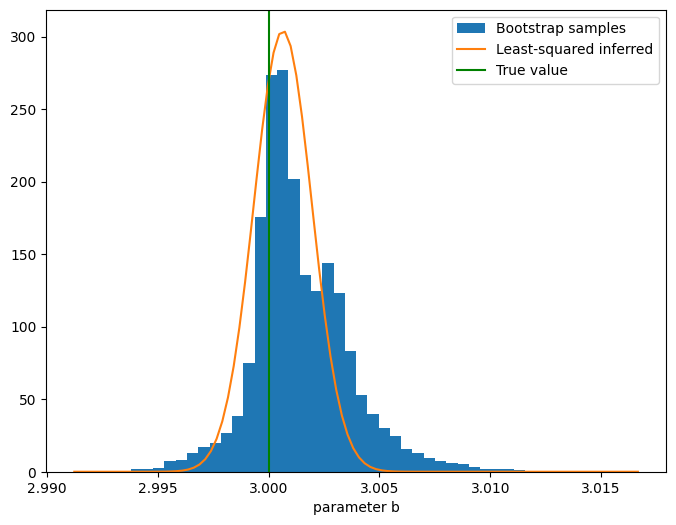

In [ ]:
# repeat the bootstrap (same code as cell above, might want to put this into a function)

# simulate data
x_data = np.linspace(xmin, xmax, n_points)
y_sim, y_sim_unc = sim_data(x_data)

p0 = [a_true*1.01, b_true*1.01]	# we pick the starting point close to the correct location (needed for stable least-squares)

# let's go bootstrap
for i in range(B):

	# pick random samples with replacement


	# run least-squares for each bootstrap sample
	# (we only need the best-fit, so absolute_sigma is not relevant here)

	if i % 1000==0:
		print ('# left', B-i)


# yoir code here


## PART 3 adding more parameters
Let's simualte data from a slighly more complex model, with two extra parameters, and try to recover this.

- I picked the two extra parameters to yield only a small deviation from our original linear model.
- I simulate 50 data points to make it  realistic, but not too slow.


In [ ]:
# here we use a pointer as our function argument to allow flexible input
# for more explanation see:
# https://stackoverflow.com/questions/36901/what-does-double-star-asterisk-and-star-asterisk-do-for-parameters

def poly_model(x, *p):
	'''
	polynomial of degree len(p)
	'''
	return  np.polyval(p, x)

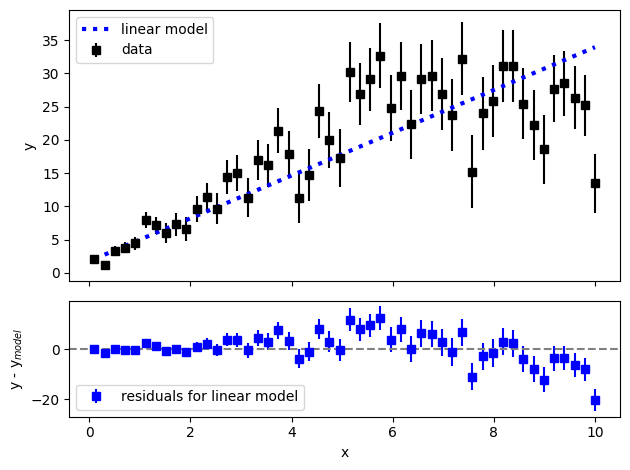

In [ ]:
# pick one model to simualate data

p_true = [-0.06,0.5, b_true, a_true] # "modest" change with respect to a straight line
def true_poly_model(x):
  return poly_model(x, *p_true)

#model = linear_model
model = true_poly_model

# simulate dataset with 50 points
n_points = 50
x_data = np.linspace(xmin, xmax, n_points)
y_sim, y_sim_unc = sim_data(x_data)

# plot the simulation results
#plt.clf()
fig, axs = plt.subplots(2, 1, sharex=True, height_ratios=[0.7,0.3])
#axs[0].plot(x_data, model(x_data),color='grey', lw=3, label='truth')
axs[0].errorbar(x_data, y_sim,y_sim_unc, fmt='sk', label='data')


# also show the original linear model: 2 parameters
n_pars=2
p0 = np.zeros(n_pars)
ls_popt, ls_cov = curve_fit(poly_model, x_data, y_sim, sigma=y_sim_unc, p0=p0)
model_data = poly_model(x_data, *ls_popt)
chi2_2par = chisquared(model_data,  y_sim, y_sim_unc)
axs[0].plot(x_data, model_data, lw=3, ls=':', color='blue', label='linear model')
axs[0].set_ylabel('y')
axs[0].legend()

#look at the residuals
axs[1].errorbar(x_data, y_sim-model_data, y_sim_unc, fmt='sb', label='residuals for linear model')
axs[1].axhline(0, ls='--', color='grey')
axs[1].legend()

axs[1].set_ylabel('y - y$_{model}$')
axs[1].set_xlabel('x')
plt.tight_layout()



In [1]:
# now repeat the least-squares fit, but for increasing number of degrees in our polynomial



In [2]:
# let's see what the chi2.dof looks like as a function of the number of polynomial parameters

In [3]:
# now  check the BIC and AIC as the function of the number of the poly degree


Finally, we repeat these steps 500 times with new simulated data to get a feeling for the AIC and BIC distribution

_this takes about 1 minute on Google colab (consider adding a print statement every 100 steps to check how far along you are in the loop_


In [4]:
nsim = 500



In [5]:
# new cell for plotting to the results (to avoid running simulation again)
